In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)



In [4]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [5]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
test = pd.read_csv("./data/test.csv", encoding="latin-1")


In [6]:
app_train = train.copy()
app_test = test.copy()
app_train.drop_duplicates(inplace=True)
app_train.drop_duplicates(subset=["ID"], keep='first', inplace=True)


In [7]:
train[train.ID == 2273]


ID      DiagnosticICD10Code SurgeryGroup   AnesthesiaType SurgeryName  \
1221  2273  {nan, 'M20.1', 'I87.2'}   {'B', 'C'}  Spinal Anestezi         NaN   
1871  2273  {nan, 'M20.1', 'I87.2'}   {'B', 'C'}  Spinal Anestezi         NaN   

      Age     Sex           Service  DoctorID  AnaesthetistID  \
1221   60  FEMALE  ORTOPED? SERV?S?        32              11   
1871   60  FEMALE  ORTOPED? SERV?S?        32              11   

      ElapsedTime(second)  
1221                 6474  
1871                 6472

In [8]:
app_train[app_train.ID == 2273]


ID      DiagnosticICD10Code SurgeryGroup   AnesthesiaType SurgeryName  \
1221  2273  {nan, 'M20.1', 'I87.2'}   {'B', 'C'}  Spinal Anestezi         NaN   

      Age     Sex           Service  DoctorID  AnaesthetistID  \
1221   60  FEMALE  ORTOPED? SERV?S?        32              11   

      ElapsedTime(second)  
1221                 6474

In [9]:
app_train_clean = app_train.copy()
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str[1:-1]
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str.replace("'","")
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str[1:-1]
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str.replace("'","")
app_train_clean.head()

ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0  1829                 L05               C  Spinal Anestezi   
1  1104               N20.1               C  Spinal Anestezi   
2  1850               K80.8               B   Genel Anestezi   
3  1059          nan, M51.1            0, B   Genel Anestezi   
4   608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   

                                         SurgeryName  Age     Sex  \
0                                     Pilonidal kist   26    MALE   
1                                                NaN   24    MALE   
2                                Kolelitiazis, di?er   38    MALE   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41  FEMALE   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49  FEMALE   

                 Service  DoctorID  AnaesthetistID  ElapsedTime(second)  
0  GENEL CERRAH? SERV?S?         5              13                 6333  
1        ÜROLOJ? SERV?S?        15               3                 2972  
2  GENEL CERRAH? SERV?S?        36              14                 4647  
3       ORTOPED? SERV?S?        42               6                 4871  
4       ORTOPED? SERV?S?        42               9                 9046

In [10]:
app_test_clean = app_test.copy()
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str[1:-1]
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str.replace("'","")
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str[1:-1]
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str.replace("'","")
app_test_clean.head()

ID DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
0  1669               H26.9            C    Sedo Analjezi   
1  2091               L05.9            C  Spinal Anestezi   
2   585               M50.1           A3   Genel Anestezi   
3  1455               S42.2            B   Genel Anestezi   
4  1801                 I82         0, E    Sedo Analjezi   

                                         SurgeryName  Age     Sex  \
0                                                NaN   70  FEMALE   
1                                     Pilonidal kist   41    MALE   
2       Servikal disk bozukluklar?, radikülopati ile   59  FEMALE   
3                              Humerus üst uç k?r???   54  FEMALE   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50    MALE   

                    Service  DoctorID  AnaesthetistID  
0  GÖZ HASTALIKLARI SERV?S?        49              13  
1     GENEL CERRAH? SERV?S?        36               6  
2          ORTOPED? SERV?S?        42              14  
3          ORTOPED? SERV?S?        23              14  
4               KVC SERV?S?        46              13

In [11]:
app_train_clean['Any_NaN_Diagnos'] = app_train_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)
app_test_clean['Any_NaN_Diagnos'] = app_test_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)

In [12]:
def clean_diagnosis(diagnosis):
    if isinstance(diagnosis, str):
        return set(diagnosis.replace(', nan', '').replace(' nan,', '').replace('nan,', '').replace(' ', '').split(','))
    else:
        return diagnosis

app_train_clean['Diagnos_Clean'] = app_train_clean['DiagnosticICD10Code'].apply(clean_diagnosis)
app_test_clean['Diagnos_Clean'] = app_test_clean['DiagnosticICD10Code'].apply(clean_diagnosis)

In [13]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]
app_train_clean["SurgeryGroup_Encode"] = app_train_clean["SurgeryGroup"].apply(mapper)
app_test_clean["SurgeryGroup_Encode"] = app_test_clean["SurgeryGroup"].apply(mapper)

In [14]:
app_train_clean["SurgeryGroup_Sum"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_train_clean["SurgeryGroup_Count"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_train_clean["SurgeryGroup_Avg"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_train_clean["SurgeryGroup_Std"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_train_clean["SurgeryGroup_Max"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_train_clean["SurgeryGroup_Min"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

In [15]:
app_test_clean["SurgeryGroup_Sum"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_test_clean["SurgeryGroup_Count"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_test_clean["SurgeryGroup_Avg"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_test_clean["SurgeryGroup_Std"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_test_clean["SurgeryGroup_Max"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_test_clean["SurgeryGroup_Min"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

In [16]:
app_train_clean[app_train_clean["ID"]==3228]

ID                                DiagnosticICD10Code SurgeryGroup  \
92  3228  K21.9, J15.9, N30.0, N21.1, N30.9, L30.3, N40,...            B   

     AnesthesiaType  SurgeryName  Age   Sex          Service  DoctorID  \
92  Spinal Anestezi  Üretra ta??   68  MALE  ÜROLOJ? SERV?S?        15   

    AnaesthetistID  ElapsedTime(second)  Any_NaN_Diagnos  \
92               2                 4581                0   

                                        Diagnos_Clean SurgeryGroup_Encode  \
92  {N32.0, N21.1, K21.9, M19.9, N30.9, J15.9, N30...                 [4]   

    SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
92                 4                   1               4.0               0.0   

    SurgeryGroup_Max  SurgeryGroup_Min  
92                 4                 4

In [17]:
app_train_clean[app_train_clean["ID"]==245]

ID                   DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
2014  245  K21.9, J15.9, R31, N30.0, M19.9, I10            C  Spinal Anestezi   

     SurgeryName  Age   Sex          Service  DoctorID  AnaesthetistID  \
2014         NaN   71  MALE  ÜROLOJ? SERV?S?        15               2   

      ElapsedTime(second)  Any_NaN_Diagnos  \
2014                 5415                0   

                               Diagnos_Clean SurgeryGroup_Encode  \
2014  {K21.9, M19.9, R31, J15.9, N30.0, I10}                 [3]   

      SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  \
2014                 3                   1               3.0   

      SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  
2014               0.0                 3                 3

In [18]:
app_train_clean.loc[92, "Diagnos_Clean"] = np.nan
app_train_clean.loc[2014, "Diagnos_Clean"] = np.nan

In [19]:
app_train_clean["Diagnos_Clean"] = app_train_clean["Diagnos_Clean"].fillna('')
app_train_clean['Diagnos_Clean'] = app_train_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [20]:
app_test_clean.loc[787, "Diagnos_Clean"] = np.nan
app_test_clean.loc[285, "Diagnos_Clean"] = np.nan

In [21]:
app_test_clean["Diagnos_Clean"] = app_test_clean["Diagnos_Clean"].fillna('')
app_test_clean['Diagnos_Clean'] = app_test_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [22]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools


# function to generate all possible combinations with first characters for a set of diagnoses
def generate_combinations_first_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# function to generate all possible combinations with all characters for a set of diagnoses
def generate_combinations_all_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_train_clean.at[i, col_name] = combo

for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_train_clean.at[i, col_name] = combo

app_train_clean.head()

  0%|          | 0/2714 [00:00<?, ?it/s]

  0%|          | 0/2714 [00:00<?, ?it/s]

ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0  1829                 L05               C  Spinal Anestezi   
1  1104               N20.1               C  Spinal Anestezi   
2  1850               K80.8               B   Genel Anestezi   
3  1059          nan, M51.1            0, B   Genel Anestezi   
4   608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   

                                         SurgeryName  Age     Sex  \
0                                     Pilonidal kist   26    MALE   
1                                                NaN   24    MALE   
2                                Kolelitiazis, di?er   38    MALE   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41  FEMALE   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49  FEMALE   

                 Service  DoctorID  AnaesthetistID  ElapsedTime(second)  \
0  GENEL CERRAH? SERV?S?         5              13                 6333   
1        ÜROLOJ? SERV?S?        15               3                 2972   
2  GENEL CERRAH? SERV?S?        36              14                 4647   
3       ORTOPED? SERV?S?        42               6                 4871   
4       ORTOPED? SERV?S?        42               9                 9046   

   Any_NaN_Diagnos   Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  \
0                0           [L05]                 [3]                 3   
1                0         [N20.1]                 [3]                 3   
2                0         [K80.8]                 [4]                 4   
3                1         [M51.1]              [1, 4]                 5   
4                1  [M51.1, M48.0]     [1, 4, 3, 2, 5]                15   

   SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  \
0                   1               3.0          0.000000                 3   
1                   1               3.0          0.000000                 3   
2                   1               4.0          0.000000                 4   
3                   2               2.5          1.500000                 4   
4                   5               3.0          1.414214                 5   

   SurgeryGroup_Min combination_first_1 combination_first_2  \
0                 3                   L                 NaN   
1                 3                   N                 NaN   
2                 4                   K                 NaN   
3                 1                   M                 NaN   
4                 1                   M                   M   

  combination_first_3 combination_first_4 combination_first_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 M-M                 NaN                 NaN   

  combination_first_6 combination_first_7 combination_first_8  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_9 combination_first_10 combination_first_11  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

  combination_first_12 combination_first_13 combination_first_14  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN           

In [23]:
for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_test_clean.at[i, col_name] = combo

for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_test_clean.at[i, col_name] = combo

app_test_clean.head()

  0%|          | 0/1211 [00:00<?, ?it/s]

  0%|          | 0/1211 [00:00<?, ?it/s]

ID DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
0  1669               H26.9            C    Sedo Analjezi   
1  2091               L05.9            C  Spinal Anestezi   
2   585               M50.1           A3   Genel Anestezi   
3  1455               S42.2            B   Genel Anestezi   
4  1801                 I82         0, E    Sedo Analjezi   

                                         SurgeryName  Age     Sex  \
0                                                NaN   70  FEMALE   
1                                     Pilonidal kist   41    MALE   
2       Servikal disk bozukluklar?, radikülopati ile   59  FEMALE   
3                              Humerus üst uç k?r???   54  FEMALE   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50    MALE   

                    Service  DoctorID  AnaesthetistID  Any_NaN_Diagnos  \
0  GÖZ HASTALIKLARI SERV?S?        49              13                0   
1     GENEL CERRAH? SERV?S?        36               6                0   
2          ORTOPED? SERV?S?        42              14                0   
3          ORTOPED? SERV?S?        23              14                0   
4               KVC SERV?S?        46              13                0   

  Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  SurgeryGroup_Count  \
0       [H26.9]                 [3]                 3                   1   
1       [L05.9]                 [3]                 3                   1   
2       [M50.1]                 [5]                 5                   1   
3       [S42.2]                 [4]                 4                   1   
4         [I82]              [1, 1]                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

  combination_first_1 combination_first_2 combination_first_3  \
0                   H                 NaN                 NaN   
1                   L                 NaN                 NaN   
2                   M                 NaN                 NaN   
3                   S                 NaN                 NaN   
4                   I                 NaN                 NaN   

  combination_first_4 combination_first_5 combination_first_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_7 combination_first_8 combination_first_9  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_10 combination_first_11 combination_first_12  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  combination_first_13 combination_first_14 combination_first_15  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN  

In [25]:
app_train_encode = app_train_clean.copy()
app_test_encode = app_test_clean.copy()


In [26]:
app_train_encode['Age_Range'] = pd.cut(app_train_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])
app_test_encode['Age_Range'] = pd.cut(app_test_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])


In [27]:
app_train_encode.head()

ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0  1829                 L05               C  Spinal Anestezi   
1  1104               N20.1               C  Spinal Anestezi   
2  1850               K80.8               B   Genel Anestezi   
3  1059          nan, M51.1            0, B   Genel Anestezi   
4   608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   

                                         SurgeryName  Age     Sex  \
0                                     Pilonidal kist   26    MALE   
1                                                NaN   24    MALE   
2                                Kolelitiazis, di?er   38    MALE   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41  FEMALE   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49  FEMALE   

                 Service  DoctorID  AnaesthetistID  ElapsedTime(second)  \
0  GENEL CERRAH? SERV?S?         5              13                 6333   
1        ÜROLOJ? SERV?S?        15               3                 2972   
2  GENEL CERRAH? SERV?S?        36              14                 4647   
3       ORTOPED? SERV?S?        42               6                 4871   
4       ORTOPED? SERV?S?        42               9                 9046   

   Any_NaN_Diagnos   Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  \
0                0           [L05]                 [3]                 3   
1                0         [N20.1]                 [3]                 3   
2                0         [K80.8]                 [4]                 4   
3                1         [M51.1]              [1, 4]                 5   
4                1  [M51.1, M48.0]     [1, 4, 3, 2, 5]                15   

   SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  \
0                   1               3.0          0.000000                 3   
1                   1               3.0          0.000000                 3   
2                   1               4.0          0.000000                 4   
3                   2               2.5          1.500000                 4   
4                   5               3.0          1.414214                 5   

   SurgeryGroup_Min combination_first_1 combination_first_2  \
0                 3                   L                 NaN   
1                 3                   N                 NaN   
2                 4                   K                 NaN   
3                 1                   M                 NaN   
4                 1                   M                   M   

  combination_first_3 combination_first_4 combination_first_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 M-M                 NaN                 NaN   

  combination_first_6 combination_first_7 combination_first_8  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_9 combination_first_10 combination_first_11  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

  combination_first_12 combination_first_13 combination_first_14  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN           

In [28]:
app_test_encode.head()


ID DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
0  1669               H26.9            C    Sedo Analjezi   
1  2091               L05.9            C  Spinal Anestezi   
2   585               M50.1           A3   Genel Anestezi   
3  1455               S42.2            B   Genel Anestezi   
4  1801                 I82         0, E    Sedo Analjezi   

                                         SurgeryName  Age     Sex  \
0                                                NaN   70  FEMALE   
1                                     Pilonidal kist   41    MALE   
2       Servikal disk bozukluklar?, radikülopati ile   59  FEMALE   
3                              Humerus üst uç k?r???   54  FEMALE   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50    MALE   

                    Service  DoctorID  AnaesthetistID  Any_NaN_Diagnos  \
0  GÖZ HASTALIKLARI SERV?S?        49              13                0   
1     GENEL CERRAH? SERV?S?        36               6                0   
2          ORTOPED? SERV?S?        42              14                0   
3          ORTOPED? SERV?S?        23              14                0   
4               KVC SERV?S?        46              13                0   

  Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  SurgeryGroup_Count  \
0       [H26.9]                 [3]                 3                   1   
1       [L05.9]                 [3]                 3                   1   
2       [M50.1]                 [5]                 5                   1   
3       [S42.2]                 [4]                 4                   1   
4         [I82]              [1, 1]                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

  combination_first_1 combination_first_2 combination_first_3  \
0                   H                 NaN                 NaN   
1                   L                 NaN                 NaN   
2                   M                 NaN                 NaN   
3                   S                 NaN                 NaN   
4                   I                 NaN                 NaN   

  combination_first_4 combination_first_5 combination_first_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_7 combination_first_8 combination_first_9  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_10 combination_first_11 combination_first_12  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  combination_first_13 combination_first_14 combination_first_15  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN  

In [29]:
train_ohe_cols = list(app_train_encode.columns[3:4]) + list(app_train_encode.columns[6:10]) + list(app_train_encode.columns[20:])
test_ohe_cols = list(app_test_encode.columns[3:4]) + list(app_test_encode.columns[6:10]) + list(app_test_encode.columns[19:])


In [30]:
set(train_ohe_cols) - set(test_ohe_cols)

set()

In [31]:
app_train_encode = pd.get_dummies(app_train_encode, columns=train_ohe_cols)
app_test_encode = pd.get_dummies(app_test_encode, columns=test_ohe_cols)
app_train_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)
app_test_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)



In [32]:
app_train_encode.head()

SurgeryName  Age  \
0                                     Pilonidal kist   26   
1                                                NaN   24   
2                                Kolelitiazis, di?er   38   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49   

   ElapsedTime(second)  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0                 6333                0                 3                   1   
1                 2972                0                 3                   1   
2                 4647                0                 4                   1   
3                 4871                1                 5                   2   
4                 9046                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Periferik Bloklar  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   AnesthesiaType_Periferik Bloklar ve Genel Anestezi  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   AnesthesiaType_Rejyonel Sinir Blo?u  AnesthesiaType_Sedo Analjezi  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   AnesthesiaType_Seçilmemi?  AnesthesiaType_Spinal Anestezi  \
0                          0                               1   
1                          0                               1   
2                          0                               0   
3                          0                               0   
4                          0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         

In [45]:
app_train_encode["SurgeryName"] = app_train_encode["SurgeryName"].str.strip()

In [46]:
app_test_encode["SurgeryName"] = app_test_encode["SurgeryName"].str.strip()


In [48]:
app_train_encode.shape

(2714, 1744)

In [49]:
app_test_encode.shape

(1211, 1343)

In [50]:
target = app_train_encode["ElapsedTime(second)"]
app_train_encode, app_test_encode = app_train_encode.align(app_test_encode, join = 'inner', axis = 1)

In [51]:
app_train_encode["ElapsedTime(second)"] = target


In [67]:
app_train_encode.shape

(2714, 1342)

In [68]:
app_test_encode.shape

(1211, 1341)

## Encoding SurgeryName

In [55]:
import category_encoders as ce


### Catboost Encode

In [69]:
catboost_train = app_train_encode.copy()
catboost_test = app_test_encode.copy()

In [70]:
target_train = catboost_train['ElapsedTime(second)']
train_surgeries = catboost_train["SurgeryName"]
test_surgeries = catboost_test["SurgeryName"]

In [71]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(train_surgeries, target_train)
surgeries_catboost_train = cbe_encoder.transform(train_surgeries)
surgeries_catboost_test = cbe_encoder.transform(test_surgeries)

In [88]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [93]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [94]:
catboost_train["SurgeryName"] = surgeries_catboost_train

In [95]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3063.327529   26                0                 3                   1   
1  4701.867577   24                0                 3                   1   
2  4427.350276   38                0                 4                   1   
3  7993.027213   41                1                 5                   2   
4  7993.027213   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [96]:
catboost_test.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                                NaN   70                0   
1                                     Pilonidal kist   41                0   
2       Servikal disk bozukluklar?, radikülopati ile   59                0   
3                              Humerus üst uç k?r???   54                0   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50                0   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0               0.0   
1                 3                   1               3.0               0.0   
2                 5                   1               5.0               0.0   
3                 4                   1               4.0               0.0   
4                 2                   2               1.0               0.0   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 5                 5                                 0   
3                 4                 4                                 0   
4                 1                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                       

In [97]:
catboost_test["SurgeryName"] = surgeries_catboost_test

In [98]:
catboost_test.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  4701.867577   70                0                 3                   1   
1  3063.327529   41                0                 3                   1   
2  7667.902609   59                0                 5                   1   
3  6566.952469   54                0                 4                   1   
4  2422.370887   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [100]:
catboost_train.shape


(2714, 1342)

In [99]:
catboost_test.shape

(1211, 1341)

In [115]:
def encode_test(surgery_train):
    from sklearn.model_selection import KFold
    import xgboost as xgb
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import re


    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    y = surgery_train["ElapsedTime(second)"]
    X = surgery_train.drop(columns=["ElapsedTime(second)"])
    X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

    mse_errs = []
    rmse_errs = []
    mae_errs = []
    r2_errs = []

    models = []

    kf = KFold(n_splits=10, shuffle=True, random_state= 42)

    for split_train, split_val in list(kf.split(X)):
        
        split_train = X.index[split_train]
        split_val = X.index[split_val]
        
        X_train, y_train = X.loc[split_train], y.loc[split_train]
        X_val, y_val = X.loc[split_val], y.loc[split_val]
        print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
        

        model.fit(X_train, y_train, eval_set = [(X_val, y_val), (X_train, y_train)], eval_metric='rmse')
        
        preds = model.predict(X_val)
        
        rmse_err = mean_squared_error(y_val, preds, squared=False)
        print("Fold RMSE: ", rmse_err)
        rmse_errs.append(rmse_err)

        mse_err = mean_squared_error(y_val, preds)
        print("Fold MSE: ", mse_err)
        mse_errs.append(mse_err)

        mae_err = mean_absolute_error(y_val, preds)
        print("Fold MAE: ", mae_err)
        mae_errs.append(mae_err)

        r2_err = r2_score(y_val, preds)
        print("Fold R2: ", r2_err)
        r2_errs.append(r2_err)

        models.append(model)
        
        print("\n", "*"*70, "\n")

    import plotly.express as px
    importance = [model.feature_importances_ for model in models]

    f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                            pd.Series(np.mean(importance,axis=0),name="Importance")],
                            axis=1).sort_values(by='Importance',
                                                ascending=True)

    fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
    fig.update_layout(
        title_text="First 20 Important Features - XGB Average of Folds"
    )
    fig.show()
    return models

In [116]:
models = encode_test(catboost_train)

Train shape: (2442, 1341) | Val Shape: (272, 1341)
[0]	validation_0-rmse:4126.21642	validation_1-rmse:3963.74366
[1]	validation_0-rmse:3161.38793	validation_1-rmse:2999.22604
[2]	validation_0-rmse:2552.62347	validation_1-rmse:2369.11609


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:2144.30364	validation_1-rmse:1944.17719
[4]	validation_0-rmse:1895.43472	validation_1-rmse:1674.76943
[5]	validation_0-rmse:1742.79173	validation_1-rmse:1515.23160
[6]	validation_0-rmse:1656.54461	validation_1-rmse:1413.42200
[7]	validation_0-rmse:1610.23423	validation_1-rmse:1341.44103
[8]	validation_0-rmse:1576.88634	validation_1-rmse:1292.54179
[9]	validation_0-rmse:1579.22668	validation_1-rmse:1252.12062
[10]	validation_0-rmse:1570.07090	validation_1-rmse:1227.73149
[11]	validation_0-rmse:1565.19629	validation_1-rmse:1205.94884
[12]	validation_0-rmse:1556.33871	validation_1-rmse:1196.03927
[13]	validation_0-rmse:1550.35337	validation_1-rmse:1187.86827
[14]	validation_0-rmse:1548.59123	validation_1-rmse:1168.21316
[15]	validation_0-rmse:1547.71785	validation_1-rmse:1163.11215
[16]	validation_0-rmse:1546.07586	validation_1-rmse:1151.51669
[17]	validation_0-rmse:1548.84648	validation_1-rmse:1136.29177
[18]	validation_0-rmse:1546.40563	validation_1-rmse:1129.27137

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:2439.48354	validation_1-rmse:1893.59021
[4]	validation_0-rmse:2192.16563	validation_1-rmse:1639.91533
[5]	validation_0-rmse:2038.80943	validation_1-rmse:1472.43425
[6]	validation_0-rmse:1912.36701	validation_1-rmse:1361.18722
[7]	validation_0-rmse:1849.40342	validation_1-rmse:1295.51293
[8]	validation_0-rmse:1803.92308	validation_1-rmse:1238.89628
[9]	validation_0-rmse:1785.32817	validation_1-rmse:1209.62638
[10]	validation_0-rmse:1762.43055	validation_1-rmse:1188.85599
[11]	validation_0-rmse:1756.24984	validation_1-rmse:1164.11537
[12]	validation_0-rmse:1744.34310	validation_1-rmse:1146.16943
[13]	validation_0-rmse:1733.68366	validation_1-rmse:1115.37797
[14]	validation_0-rmse:1720.74392	validation_1-rmse:1106.52591
[15]	validation_0-rmse:1722.51387	validation_1-rmse:1097.00887
[16]	validation_0-rmse:1716.04960	validation_1-rmse:1089.11073
[17]	validation_0-rmse:1705.67619	validation_1-rmse:1085.82340
[18]	validation_0-rmse:1704.28326	validation_1-rmse:1081.58849

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:1967.36970	validation_1-rmse:1950.37330
[4]	validation_0-rmse:1759.06737	validation_1-rmse:1688.05560
[5]	validation_0-rmse:1656.02766	validation_1-rmse:1517.44758
[6]	validation_0-rmse:1586.43998	validation_1-rmse:1417.44056
[7]	validation_0-rmse:1547.67032	validation_1-rmse:1332.52356
[8]	validation_0-rmse:1528.11912	validation_1-rmse:1290.78200
[9]	validation_0-rmse:1504.57776	validation_1-rmse:1255.96625
[10]	validation_0-rmse:1510.92389	validation_1-rmse:1226.75488
[11]	validation_0-rmse:1508.51937	validation_1-rmse:1211.50955
[12]	validation_0-rmse:1499.70869	validation_1-rmse:1186.98304
[13]	validation_0-rmse:1493.43832	validation_1-rmse:1166.79616
[14]	validation_0-rmse:1492.89870	validation_1-rmse:1154.02271
[15]	validation_0-rmse:1492.10554	validation_1-rmse:1148.68057
[16]	validation_0-rmse:1496.42784	validation_1-rmse:1135.45718
[17]	validation_0-rmse:1497.00757	validation_1-rmse:1124.08861
[18]	validation_0-rmse:1495.44277	validation_1-rmse:1118.67322

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2142.49091	validation_1-rmse:2369.91039
[3]	validation_0-rmse:1796.29984	validation_1-rmse:1948.58340
[4]	validation_0-rmse:1606.78335	validation_1-rmse:1674.85285
[5]	validation_0-rmse:1525.82490	validation_1-rmse:1511.99791
[6]	validation_0-rmse:1503.59013	validation_1-rmse:1407.32725
[7]	validation_0-rmse:1492.80353	validation_1-rmse:1327.70786
[8]	validation_0-rmse:1481.62143	validation_1-rmse:1279.03242
[9]	validation_0-rmse:1485.90180	validation_1-rmse:1252.34070
[10]	validation_0-rmse:1487.92612	validation_1-rmse:1224.77198
[11]	validation_0-rmse:1482.72776	validation_1-rmse:1198.78666
[12]	validation_0-rmse:1496.49799	validation_1-rmse:1187.01879
[13]	validation_0-rmse:1498.68310	validation_1-rmse:1179.72779
[14]	validation_0-rmse:1502.17770	validation_1-rmse:1161.47965
[15]	validation_0-rmse:1503.89962	validation_1-rmse:1151.95154
[16]	validation_0-rmse:1506.51148	validation_1-rmse:1146.67233
[17]	validation_0-rmse:1502.52087	validation_1-rmse:1142.74797


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2106.30029	validation_1-rmse:2389.45623
[3]	validation_0-rmse:1764.03911	validation_1-rmse:1973.62988
[4]	validation_0-rmse:1588.36899	validation_1-rmse:1706.67705
[5]	validation_0-rmse:1501.24063	validation_1-rmse:1541.86408
[6]	validation_0-rmse:1469.75281	validation_1-rmse:1437.99396
[7]	validation_0-rmse:1463.65713	validation_1-rmse:1362.05191
[8]	validation_0-rmse:1444.74710	validation_1-rmse:1312.67860
[9]	validation_0-rmse:1445.49996	validation_1-rmse:1278.11452
[10]	validation_0-rmse:1446.07428	validation_1-rmse:1246.16710
[11]	validation_0-rmse:1444.20155	validation_1-rmse:1227.99109
[12]	validation_0-rmse:1450.83666	validation_1-rmse:1216.05204
[13]	validation_0-rmse:1452.91791	validation_1-rmse:1201.71130
[14]	validation_0-rmse:1448.48837	validation_1-rmse:1175.55743
[15]	validation_0-rmse:1449.33163	validation_1-rmse:1169.98129
[16]	validation_0-rmse:1445.31079	validation_1-rmse:1160.28127
[17]	validation_0-rmse:1445.13106	validation_1-rmse:1153.12115


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:2106.41720	validation_1-rmse:1940.57517
[4]	validation_0-rmse:1916.63488	validation_1-rmse:1676.38774
[5]	validation_0-rmse:1805.33881	validation_1-rmse:1502.14495
[6]	validation_0-rmse:1746.70376	validation_1-rmse:1397.17232
[7]	validation_0-rmse:1696.55322	validation_1-rmse:1325.92437
[8]	validation_0-rmse:1680.52227	validation_1-rmse:1279.51240
[9]	validation_0-rmse:1661.26303	validation_1-rmse:1248.05874
[10]	validation_0-rmse:1646.93679	validation_1-rmse:1217.45942
[11]	validation_0-rmse:1636.66807	validation_1-rmse:1200.47316
[12]	validation_0-rmse:1648.70337	validation_1-rmse:1174.50319
[13]	validation_0-rmse:1646.35225	validation_1-rmse:1167.49784
[14]	validation_0-rmse:1647.37982	validation_1-rmse:1160.33633
[15]	validation_0-rmse:1637.93202	validation_1-rmse:1139.25382
[16]	validation_0-rmse:1631.69885	validation_1-rmse:1126.63029
[17]	validation_0-rmse:1628.64357	validation_1-rmse:1120.63912
[18]	validation_0-rmse:1630.05736	validation_1-rmse:1117.10206

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2695.96236	validation_1-rmse:2355.92382
[3]	validation_0-rmse:2347.06147	validation_1-rmse:1932.13507
[4]	validation_0-rmse:2138.99801	validation_1-rmse:1678.60597
[5]	validation_0-rmse:2012.16042	validation_1-rmse:1503.36321
[6]	validation_0-rmse:1942.75112	validation_1-rmse:1400.70899
[7]	validation_0-rmse:1885.23806	validation_1-rmse:1317.12799
[8]	validation_0-rmse:1864.76210	validation_1-rmse:1269.37976
[9]	validation_0-rmse:1813.96542	validation_1-rmse:1223.28671
[10]	validation_0-rmse:1810.39036	validation_1-rmse:1197.82389
[11]	validation_0-rmse:1807.97788	validation_1-rmse:1177.71548
[12]	validation_0-rmse:1806.30574	validation_1-rmse:1161.94289
[13]	validation_0-rmse:1794.54314	validation_1-rmse:1145.31926
[14]	validation_0-rmse:1791.36359	validation_1-rmse:1133.70670
[15]	validation_0-rmse:1795.01633	validation_1-rmse:1121.29468
[16]	validation_0-rmse:1791.73162	validation_1-rmse:1116.39133
[17]	validation_0-rmse:1793.95820	validation_1-rmse:1109.04593


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2508.57797	validation_1-rmse:2364.14082
[3]	validation_0-rmse:2107.11378	validation_1-rmse:1948.60666
[4]	validation_0-rmse:1834.58091	validation_1-rmse:1671.50514
[5]	validation_0-rmse:1685.03587	validation_1-rmse:1508.11501
[6]	validation_0-rmse:1605.92662	validation_1-rmse:1395.17575
[7]	validation_0-rmse:1572.95003	validation_1-rmse:1329.72936
[8]	validation_0-rmse:1559.31380	validation_1-rmse:1287.95883
[9]	validation_0-rmse:1554.92289	validation_1-rmse:1263.05976
[10]	validation_0-rmse:1547.27914	validation_1-rmse:1237.49970
[11]	validation_0-rmse:1538.10345	validation_1-rmse:1213.52034
[12]	validation_0-rmse:1535.34341	validation_1-rmse:1200.96122
[13]	validation_0-rmse:1527.90969	validation_1-rmse:1191.35120
[14]	validation_0-rmse:1530.11349	validation_1-rmse:1186.12843
[15]	validation_0-rmse:1530.81896	validation_1-rmse:1174.32355
[16]	validation_0-rmse:1531.29783	validation_1-rmse:1169.22613
[17]	validation_0-rmse:1528.14835	validation_1-rmse:1153.35698


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2257.30960	validation_1-rmse:2374.52219
[3]	validation_0-rmse:1944.58889	validation_1-rmse:1947.71954
[4]	validation_0-rmse:1753.48079	validation_1-rmse:1688.79395
[5]	validation_0-rmse:1645.55116	validation_1-rmse:1524.90402
[6]	validation_0-rmse:1596.45504	validation_1-rmse:1410.39240
[7]	validation_0-rmse:1576.99741	validation_1-rmse:1348.17584
[8]	validation_0-rmse:1546.83028	validation_1-rmse:1287.54446
[9]	validation_0-rmse:1517.16459	validation_1-rmse:1239.20065
[10]	validation_0-rmse:1507.31441	validation_1-rmse:1215.21382
[11]	validation_0-rmse:1504.56992	validation_1-rmse:1200.99643
[12]	validation_0-rmse:1501.78265	validation_1-rmse:1188.99432
[13]	validation_0-rmse:1503.01600	validation_1-rmse:1177.69911
[14]	validation_0-rmse:1509.94194	validation_1-rmse:1162.39181
[15]	validation_0-rmse:1508.02471	validation_1-rmse:1146.79397
[16]	validation_0-rmse:1507.49473	validation_1-rmse:1141.88065
[17]	validation_0-rmse:1506.30801	validation_1-rmse:1133.84261


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2564.09003	validation_1-rmse:2358.13765
[3]	validation_0-rmse:2170.40941	validation_1-rmse:1935.04069
[4]	validation_0-rmse:1958.14556	validation_1-rmse:1670.25657
[5]	validation_0-rmse:1810.96641	validation_1-rmse:1497.35825
[6]	validation_0-rmse:1731.49762	validation_1-rmse:1394.17253
[7]	validation_0-rmse:1699.93901	validation_1-rmse:1324.98759
[8]	validation_0-rmse:1674.35503	validation_1-rmse:1266.75992
[9]	validation_0-rmse:1676.38947	validation_1-rmse:1222.23966
[10]	validation_0-rmse:1643.22751	validation_1-rmse:1202.03774
[11]	validation_0-rmse:1639.20448	validation_1-rmse:1183.78355
[12]	validation_0-rmse:1622.25005	validation_1-rmse:1174.48264
[13]	validation_0-rmse:1619.47636	validation_1-rmse:1163.25779
[14]	validation_0-rmse:1621.57229	validation_1-rmse:1143.78233
[15]	validation_0-rmse:1600.06288	validation_1-rmse:1129.29569
[16]	validation_0-rmse:1601.19158	validation_1-rmse:1123.37391
[17]	validation_0-rmse:1595.13807	validation_1-rmse:1118.61473


In [121]:
def encode_submission(surgery_test, models):
    user_id = test["ID"]

    model_preds = [model.predict(surgery_test) for model in models]
    model_preds

    sample_submission = pd.DataFrame()
    sample_submission['ID'] = user_id
    sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

    return sample_submission


In [118]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3063.327529   26                0                 3                   1   
1  4701.867577   24                0                 3                   1   
2  4427.350276   38                0                 4                   1   
3  7993.027213   41                1                 5                   2   
4  7993.027213   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [122]:
sample_submission = encode_submission(catboost_test, models)

In [123]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2779
1  2091                 2395
2   585                 7974
3  1455                 8056
4  1801                 2287

In [124]:
sample_submission.shape

(1211, 2)

In [125]:
sample_submission.to_csv("mentorship_surgeryname_catboost_encode.csv", index = False)

### Target Encode

In [137]:
target_encode_train = app_train_encode.copy()
target_encode_test = app_test_encode.copy()

In [138]:
target_train = target_encode_train['ElapsedTime(second)']
train_surgeries = target_encode_train["SurgeryName"]
test_surgeries = target_encode_test["SurgeryName"]

In [141]:
target_enc = ce.target_encoder.TargetEncoder()
target_enc.fit(train_surgeries, target_train)
surgeries_target_train = target_enc.transform(train_surgeries)
surgeries_target_test = target_enc.transform(test_surgeries)

In [142]:
target_encode_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [143]:
target_encode_train["SurgeryName"] = surgeries_target_train

In [144]:
target_encode_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3048.907498   26                0                 3                   1   
1  4702.453521   24                0                 3                   1   
2  4427.028986   38                0                 4                   1   
3  8025.878841   41                1                 5                   2   
4  8025.878841   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [145]:
target_encode_test.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                                NaN   70                0   
1                                     Pilonidal kist   41                0   
2       Servikal disk bozukluklar?, radikülopati ile   59                0   
3                              Humerus üst uç k?r???   54                0   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50                0   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0               0.0   
1                 3                   1               3.0               0.0   
2                 5                   1               5.0               0.0   
3                 4                   1               4.0               0.0   
4                 2                   2               1.0               0.0   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 5                 5                                 0   
3                 4                 4                                 0   
4                 1                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                       

In [146]:
target_encode_test["SurgeryName"] = surgeries_target_test

In [147]:
target_encode_test.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  4702.453521   70                0                 3                   1   
1  3048.907498   41                0                 3                   1   
2  6239.513062   59                0                 5                   1   
3  4934.963519   54                0                 4                   1   
4  2416.741848   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [149]:
target_encode_train.shape


(2714, 1342)

In [150]:
target_encode_test.shape

(1211, 1341)

In [151]:
models = encode_test(target_encode_train)

Train shape: (2442, 1341) | Val Shape: (272, 1341)
[0]	validation_0-rmse:4101.17440	validation_1-rmse:3967.25983


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3104.44030	validation_1-rmse:3005.71130
[2]	validation_0-rmse:2484.28018	validation_1-rmse:2356.56271
[3]	validation_0-rmse:2072.29377	validation_1-rmse:1934.31004
[4]	validation_0-rmse:1838.83544	validation_1-rmse:1652.10454
[5]	validation_0-rmse:1709.21832	validation_1-rmse:1486.82447
[6]	validation_0-rmse:1626.27569	validation_1-rmse:1372.14133
[7]	validation_0-rmse:1582.30575	validation_1-rmse:1304.45093
[8]	validation_0-rmse:1543.41075	validation_1-rmse:1256.72444
[9]	validation_0-rmse:1524.92701	validation_1-rmse:1219.36011
[10]	validation_0-rmse:1522.42794	validation_1-rmse:1187.32623
[11]	validation_0-rmse:1516.49611	validation_1-rmse:1166.61389
[12]	validation_0-rmse:1507.77234	validation_1-rmse:1151.90471
[13]	validation_0-rmse:1498.43471	validation_1-rmse:1140.44922
[14]	validation_0-rmse:1501.51648	validation_1-rmse:1134.88368
[15]	validation_0-rmse:1503.17387	validation_1-rmse:1128.69229
[16]	validation_0-rmse:1495.19703	validation_1-rmse:1111.68025
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3489.33513	validation_1-rmse:2962.99961
[2]	validation_0-rmse:2796.94372	validation_1-rmse:2324.78519
[3]	validation_0-rmse:2344.78389	validation_1-rmse:1917.87101
[4]	validation_0-rmse:2056.46482	validation_1-rmse:1640.63993
[5]	validation_0-rmse:1887.15842	validation_1-rmse:1475.24652
[6]	validation_0-rmse:1761.69109	validation_1-rmse:1361.43837
[7]	validation_0-rmse:1672.03297	validation_1-rmse:1284.34356
[8]	validation_0-rmse:1632.26242	validation_1-rmse:1239.95958
[9]	validation_0-rmse:1594.94391	validation_1-rmse:1212.80249
[10]	validation_0-rmse:1597.55939	validation_1-rmse:1185.34758
[11]	validation_0-rmse:1580.19720	validation_1-rmse:1162.76507
[12]	validation_0-rmse:1576.79438	validation_1-rmse:1145.25402
[13]	validation_0-rmse:1573.91716	validation_1-rmse:1138.72159
[14]	validation_0-rmse:1571.30836	validation_1-rmse:1128.06235
[15]	validation_0-rmse:1565.16995	validation_1-rmse:1120.32521
[16]	validation_0-rmse:1551.72189	validation_1-rmse:1109.08264
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:3836.29103	validation_1-rmse:3980.92559
[1]	validation_0-rmse:2892.97619	validation_1-rmse:3011.14109
[2]	validation_0-rmse:2275.91456	validation_1-rmse:2359.13344
[3]	validation_0-rmse:1906.03452	validation_1-rmse:1926.88484
[4]	validation_0-rmse:1688.54265	validation_1-rmse:1658.58786
[5]	validation_0-rmse:1578.75474	validation_1-rmse:1482.27971
[6]	validation_0-rmse:1519.23209	validation_1-rmse:1375.59107
[7]	validation_0-rmse:1500.67496	validation_1-rmse:1296.68783
[8]	validation_0-rmse:1493.49016	validation_1-rmse:1250.65707
[9]	validation_0-rmse:1503.25240	validation_1-rmse:1220.51722
[10]	validation_0-rmse:1506.65216	validation_1-rmse:1201.48129
[11]	validation_0-rmse:1503.47094	validation_1-rmse:1174.93951
[12]	validation_0-rmse:1503.15105	validation_1-rmse:1167.32059
[13]	validation_0-rmse:1497.07771	validation_1-rmse:1144.59397
[14]	validation_0-rmse:1496.46859	validation_1-rmse:1139.77783
[15]	validation_0-rmse:1495.13985	validation_1-rmse:1130.30137
[1

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:3723.07511	validation_1-rmse:3989.98123
[1]	validation_0-rmse:2796.57971	validation_1-rmse:3010.85657
[2]	validation_0-rmse:2209.78770	validation_1-rmse:2356.89575
[3]	validation_0-rmse:1881.18451	validation_1-rmse:1937.31169
[4]	validation_0-rmse:1695.38169	validation_1-rmse:1661.74976
[5]	validation_0-rmse:1604.96379	validation_1-rmse:1477.22538
[6]	validation_0-rmse:1588.80181	validation_1-rmse:1372.72813
[7]	validation_0-rmse:1584.39143	validation_1-rmse:1306.17904
[8]	validation_0-rmse:1590.83450	validation_1-rmse:1246.81698
[9]	validation_0-rmse:1584.05800	validation_1-rmse:1210.39521
[10]	validation_0-rmse:1569.78668	validation_1-rmse:1181.05068
[11]	validation_0-rmse:1577.51003	validation_1-rmse:1157.95750
[12]	validation_0-rmse:1585.76771	validation_1-rmse:1134.75475
[13]	validation_0-rmse:1586.42692	validation_1-rmse:1125.00818
[14]	validation_0-rmse:1585.64626	validation_1-rmse:1109.47201
[15]	validation_0-rmse:1582.74571	validation_1-rmse:1099.92574
[1

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2123.96048	validation_1-rmse:2377.08908
[3]	validation_0-rmse:1788.92225	validation_1-rmse:1951.50974
[4]	validation_0-rmse:1586.97740	validation_1-rmse:1686.51783
[5]	validation_0-rmse:1456.22547	validation_1-rmse:1511.85175
[6]	validation_0-rmse:1391.30979	validation_1-rmse:1406.84777
[7]	validation_0-rmse:1360.93322	validation_1-rmse:1325.49119
[8]	validation_0-rmse:1342.44420	validation_1-rmse:1281.86398
[9]	validation_0-rmse:1331.66697	validation_1-rmse:1230.64229
[10]	validation_0-rmse:1322.63932	validation_1-rmse:1203.28929
[11]	validation_0-rmse:1324.80976	validation_1-rmse:1184.37246
[12]	validation_0-rmse:1330.45814	validation_1-rmse:1160.59619
[13]	validation_0-rmse:1328.17315	validation_1-rmse:1152.83363
[14]	validation_0-rmse:1328.72260	validation_1-rmse:1146.18410
[15]	validation_0-rmse:1327.69462	validation_1-rmse:1130.54871
[16]	validation_0-rmse:1327.57898	validation_1-rmse:1122.81951
[17]	validation_0-rmse:1336.22802	validation_1-rmse:1112.15449


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2416.41045	validation_1-rmse:2355.30361
[3]	validation_0-rmse:2059.81957	validation_1-rmse:1932.23283
[4]	validation_0-rmse:1853.26149	validation_1-rmse:1657.41924
[5]	validation_0-rmse:1738.63003	validation_1-rmse:1476.31317
[6]	validation_0-rmse:1668.12043	validation_1-rmse:1369.85221
[7]	validation_0-rmse:1617.91777	validation_1-rmse:1297.44173
[8]	validation_0-rmse:1594.73453	validation_1-rmse:1251.65745
[9]	validation_0-rmse:1544.35982	validation_1-rmse:1218.00352
[10]	validation_0-rmse:1541.05747	validation_1-rmse:1197.11004
[11]	validation_0-rmse:1530.84237	validation_1-rmse:1170.64120
[12]	validation_0-rmse:1526.77821	validation_1-rmse:1163.62774
[13]	validation_0-rmse:1524.64964	validation_1-rmse:1141.22386
[14]	validation_0-rmse:1521.60284	validation_1-rmse:1135.80706
[15]	validation_0-rmse:1515.97428	validation_1-rmse:1127.75845
[16]	validation_0-rmse:1513.82271	validation_1-rmse:1122.94881
[17]	validation_0-rmse:1521.97207	validation_1-rmse:1111.33675


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2588.77660	validation_1-rmse:2341.80274
[3]	validation_0-rmse:2242.53860	validation_1-rmse:1913.96920
[4]	validation_0-rmse:2028.18176	validation_1-rmse:1638.24734
[5]	validation_0-rmse:1899.39052	validation_1-rmse:1475.02684
[6]	validation_0-rmse:1829.10278	validation_1-rmse:1359.05040
[7]	validation_0-rmse:1786.44331	validation_1-rmse:1288.75189
[8]	validation_0-rmse:1771.23537	validation_1-rmse:1243.00575
[9]	validation_0-rmse:1734.60590	validation_1-rmse:1214.46536
[10]	validation_0-rmse:1725.30043	validation_1-rmse:1184.23049
[11]	validation_0-rmse:1724.87090	validation_1-rmse:1156.13719
[12]	validation_0-rmse:1722.33621	validation_1-rmse:1143.10433
[13]	validation_0-rmse:1724.21904	validation_1-rmse:1127.39802
[14]	validation_0-rmse:1722.91629	validation_1-rmse:1107.89351
[15]	validation_0-rmse:1719.80142	validation_1-rmse:1103.67017
[16]	validation_0-rmse:1716.37473	validation_1-rmse:1093.10659
[17]	validation_0-rmse:1716.28589	validation_1-rmse:1089.79466


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2475.60457	validation_1-rmse:2347.99356
[3]	validation_0-rmse:2058.10921	validation_1-rmse:1924.31274
[4]	validation_0-rmse:1785.62013	validation_1-rmse:1657.48153
[5]	validation_0-rmse:1639.74430	validation_1-rmse:1489.52547
[6]	validation_0-rmse:1561.34196	validation_1-rmse:1387.40839
[7]	validation_0-rmse:1512.79462	validation_1-rmse:1307.88169
[8]	validation_0-rmse:1502.33325	validation_1-rmse:1248.75549
[9]	validation_0-rmse:1494.46924	validation_1-rmse:1206.06983
[10]	validation_0-rmse:1493.12580	validation_1-rmse:1186.04178
[11]	validation_0-rmse:1489.25818	validation_1-rmse:1176.71607
[12]	validation_0-rmse:1486.58989	validation_1-rmse:1165.43364
[13]	validation_0-rmse:1480.61820	validation_1-rmse:1155.18575
[14]	validation_0-rmse:1479.44216	validation_1-rmse:1133.04675
[15]	validation_0-rmse:1477.11238	validation_1-rmse:1127.94224
[16]	validation_0-rmse:1476.63412	validation_1-rmse:1122.26925
[17]	validation_0-rmse:1472.14763	validation_1-rmse:1115.98552


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:2816.82968	validation_1-rmse:3028.11432
[2]	validation_0-rmse:2286.70983	validation_1-rmse:2379.46637
[3]	validation_0-rmse:1900.43470	validation_1-rmse:1943.78599
[4]	validation_0-rmse:1682.05428	validation_1-rmse:1675.22135
[5]	validation_0-rmse:1571.06103	validation_1-rmse:1498.31234
[6]	validation_0-rmse:1497.05840	validation_1-rmse:1375.22020
[7]	validation_0-rmse:1471.61356	validation_1-rmse:1291.65303
[8]	validation_0-rmse:1459.64909	validation_1-rmse:1246.60512
[9]	validation_0-rmse:1445.46032	validation_1-rmse:1208.63449
[10]	validation_0-rmse:1436.67500	validation_1-rmse:1187.14891
[11]	validation_0-rmse:1434.56285	validation_1-rmse:1176.56746
[12]	validation_0-rmse:1437.75622	validation_1-rmse:1158.98031
[13]	validation_0-rmse:1439.82943	validation_1-rmse:1143.41185
[14]	validation_0-rmse:1438.09069	validation_1-rmse:1132.30191
[15]	validation_0-rmse:1432.98180	validation_1-rmse:1125.50027
[16]	validation_0-rmse:1432.86102	validation_1-rmse:1119.40571
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3172.55250	validation_1-rmse:2991.47182
[2]	validation_0-rmse:2570.29752	validation_1-rmse:2350.47944
[3]	validation_0-rmse:2190.03451	validation_1-rmse:1925.95014
[4]	validation_0-rmse:1980.65848	validation_1-rmse:1667.61227
[5]	validation_0-rmse:1861.51578	validation_1-rmse:1494.33833
[6]	validation_0-rmse:1760.77454	validation_1-rmse:1387.24983
[7]	validation_0-rmse:1689.54571	validation_1-rmse:1299.06394
[8]	validation_0-rmse:1673.61071	validation_1-rmse:1248.35179
[9]	validation_0-rmse:1660.17829	validation_1-rmse:1219.37215
[10]	validation_0-rmse:1644.75025	validation_1-rmse:1197.80558
[11]	validation_0-rmse:1636.14635	validation_1-rmse:1170.42100
[12]	validation_0-rmse:1630.67153	validation_1-rmse:1157.50868
[13]	validation_0-rmse:1625.25469	validation_1-rmse:1147.77197
[14]	validation_0-rmse:1624.50245	validation_1-rmse:1140.26386
[15]	validation_0-rmse:1623.45406	validation_1-rmse:1134.90631
[16]	validation_0-rmse:1621.32889	validation_1-rmse:1130.90636
[

In [152]:
sample_submission = encode_submission(target_encode_test, models)

In [153]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2828
1  2091                 2683
2   585                 7766
3  1455                 7925
4  1801                 2293

In [154]:
sample_submission.shape

(1211, 2)

In [155]:
sample_submission.to_csv("mentorship_surgeryname_target_encode.csv", index = False)

### Leave One Out Encode

In [156]:
loo_train = app_train_encode.copy()
loo_test = app_test_encode.copy()

In [157]:
target_train = loo_train['ElapsedTime(second)']
train_surgeries = loo_train["SurgeryName"]
test_surgeries = loo_test["SurgeryName"]

In [158]:
loo_enc = ce.leave_one_out.LeaveOneOutEncoder()
loo_enc.fit(train_surgeries, target_train)
surgeries_loo_train = loo_enc.transform(train_surgeries)
surgeries_loo_test = loo_enc.transform(test_surgeries)

In [159]:
loo_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [160]:
loo_train["SurgeryName"] = surgeries_loo_train

In [161]:
loo_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3045.666667   26                0                 3                   1   
1  4702.453521   24                0                 3                   1   
2  4427.028986   38                0                 4                   1   
3  8026.673077   41                1                 5                   2   
4  8026.673077   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [162]:
loo_test.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                                NaN   70                0   
1                                     Pilonidal kist   41                0   
2       Servikal disk bozukluklar?, radikülopati ile   59                0   
3                              Humerus üst uç k?r???   54                0   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50                0   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0               0.0   
1                 3                   1               3.0               0.0   
2                 5                   1               5.0               0.0   
3                 4                   1               4.0               0.0   
4                 2                   2               1.0               0.0   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 5                 5                                 0   
3                 4                 4                                 0   
4                 1                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                       

In [163]:
loo_test["SurgeryName"] = surgeries_loo_test

In [164]:
loo_test.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  4702.453521   70                0                 3                   1   
1  3045.666667   41                0                 3                   1   
2  7819.047619   59                0                 5                   1   
3  7603.500000   54                0                 4                   1   
4  2416.741848   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [165]:
loo_train.shape


(2714, 1342)

In [166]:
loo_test.shape

(1211, 1341)

In [167]:
models = encode_test(loo_train)

Train shape: (2442, 1341) | Val Shape: (272, 1341)
[0]	validation_0-rmse:4132.21997	validation_1-rmse:3967.75393
[1]	validation_0-rmse:3173.81831	validation_1-rmse:3004.74515


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2587.59523	validation_1-rmse:2367.65804
[3]	validation_0-rmse:2200.28255	validation_1-rmse:1946.63466
[4]	validation_0-rmse:1943.64502	validation_1-rmse:1682.09539
[5]	validation_0-rmse:1803.15299	validation_1-rmse:1511.02509
[6]	validation_0-rmse:1731.41063	validation_1-rmse:1409.93269
[7]	validation_0-rmse:1678.58445	validation_1-rmse:1344.39635
[8]	validation_0-rmse:1646.34612	validation_1-rmse:1300.86427
[9]	validation_0-rmse:1628.65931	validation_1-rmse:1250.27545
[10]	validation_0-rmse:1609.50602	validation_1-rmse:1224.64705
[11]	validation_0-rmse:1604.15318	validation_1-rmse:1204.11648
[12]	validation_0-rmse:1597.86393	validation_1-rmse:1181.42956
[13]	validation_0-rmse:1594.99821	validation_1-rmse:1174.54483
[14]	validation_0-rmse:1594.10909	validation_1-rmse:1161.80913
[15]	validation_0-rmse:1582.22761	validation_1-rmse:1140.69472
[16]	validation_0-rmse:1582.99326	validation_1-rmse:1136.28914
[17]	validation_0-rmse:1586.74677	validation_1-rmse:1131.08329


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2794.96387	validation_1-rmse:2325.76875
[3]	validation_0-rmse:2406.56723	validation_1-rmse:1914.68851
[4]	validation_0-rmse:2129.62215	validation_1-rmse:1648.62245
[5]	validation_0-rmse:1986.73839	validation_1-rmse:1486.13258
[6]	validation_0-rmse:1875.77669	validation_1-rmse:1385.21979
[7]	validation_0-rmse:1809.08413	validation_1-rmse:1317.36452
[8]	validation_0-rmse:1761.50374	validation_1-rmse:1268.29839
[9]	validation_0-rmse:1732.13207	validation_1-rmse:1225.11470
[10]	validation_0-rmse:1720.47127	validation_1-rmse:1205.35084
[11]	validation_0-rmse:1701.38247	validation_1-rmse:1189.55794
[12]	validation_0-rmse:1676.35669	validation_1-rmse:1168.77355
[13]	validation_0-rmse:1670.70610	validation_1-rmse:1153.68326
[14]	validation_0-rmse:1658.98161	validation_1-rmse:1145.79977
[15]	validation_0-rmse:1661.35768	validation_1-rmse:1134.42034
[16]	validation_0-rmse:1658.79701	validation_1-rmse:1129.02571
[17]	validation_0-rmse:1663.80392	validation_1-rmse:1122.33865


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:3886.08967	validation_1-rmse:3990.01202
[1]	validation_0-rmse:2933.39927	validation_1-rmse:3014.24087
[2]	validation_0-rmse:2328.57502	validation_1-rmse:2373.22393
[3]	validation_0-rmse:1964.28886	validation_1-rmse:1963.01264
[4]	validation_0-rmse:1757.17151	validation_1-rmse:1689.20335
[5]	validation_0-rmse:1626.92760	validation_1-rmse:1513.90407
[6]	validation_0-rmse:1577.54475	validation_1-rmse:1407.74515
[7]	validation_0-rmse:1551.22051	validation_1-rmse:1333.40757
[8]	validation_0-rmse:1544.90862	validation_1-rmse:1291.85033
[9]	validation_0-rmse:1550.36063	validation_1-rmse:1258.68067
[10]	validation_0-rmse:1540.44991	validation_1-rmse:1237.13577
[11]	validation_0-rmse:1533.34146	validation_1-rmse:1216.98718
[12]	validation_0-rmse:1525.32536	validation_1-rmse:1197.27745
[13]	validation_0-rmse:1517.73562	validation_1-rmse:1186.52555
[14]	validation_0-rmse:1518.37968	validation_1-rmse:1160.47899
[15]	validation_0-rmse:1515.77846	validation_1-rmse:1154.34037
[1

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:3723.61640	validation_1-rmse:4000.49843
[1]	validation_0-rmse:2757.63312	validation_1-rmse:3026.91762
[2]	validation_0-rmse:2150.83431	validation_1-rmse:2372.64883
[3]	validation_0-rmse:1794.95383	validation_1-rmse:1949.83368
[4]	validation_0-rmse:1629.52525	validation_1-rmse:1690.83667
[5]	validation_0-rmse:1540.48654	validation_1-rmse:1517.78286
[6]	validation_0-rmse:1515.43934	validation_1-rmse:1414.26048
[7]	validation_0-rmse:1491.37147	validation_1-rmse:1339.39344
[8]	validation_0-rmse:1470.59535	validation_1-rmse:1278.31347
[9]	validation_0-rmse:1453.06542	validation_1-rmse:1244.78892
[10]	validation_0-rmse:1449.40111	validation_1-rmse:1225.13147
[11]	validation_0-rmse:1457.27627	validation_1-rmse:1202.52114
[12]	validation_0-rmse:1465.49955	validation_1-rmse:1183.29302
[13]	validation_0-rmse:1471.89698	validation_1-rmse:1170.21910
[14]	validation_0-rmse:1473.55752	validation_1-rmse:1159.67679
[15]	validation_0-rmse:1471.67501	validation_1-rmse:1151.56526
[1

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2096.50048	validation_1-rmse:2385.55763
[3]	validation_0-rmse:1754.06078	validation_1-rmse:1962.97824
[4]	validation_0-rmse:1557.99218	validation_1-rmse:1696.26103
[5]	validation_0-rmse:1459.39955	validation_1-rmse:1534.31844
[6]	validation_0-rmse:1418.73329	validation_1-rmse:1423.96131
[7]	validation_0-rmse:1414.54598	validation_1-rmse:1363.11675
[8]	validation_0-rmse:1407.31757	validation_1-rmse:1311.88750
[9]	validation_0-rmse:1403.03024	validation_1-rmse:1264.61337
[10]	validation_0-rmse:1397.81115	validation_1-rmse:1238.96362
[11]	validation_0-rmse:1399.16349	validation_1-rmse:1223.81370
[12]	validation_0-rmse:1399.60137	validation_1-rmse:1204.94012
[13]	validation_0-rmse:1405.08687	validation_1-rmse:1198.11322
[14]	validation_0-rmse:1404.97814	validation_1-rmse:1187.17216
[15]	validation_0-rmse:1405.89952	validation_1-rmse:1176.00015
[16]	validation_0-rmse:1403.49618	validation_1-rmse:1161.35122
[17]	validation_0-rmse:1401.51520	validation_1-rmse:1153.51189


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2473.14885	validation_1-rmse:2363.93558
[3]	validation_0-rmse:2120.31073	validation_1-rmse:1944.88749
[4]	validation_0-rmse:1922.69164	validation_1-rmse:1679.62021
[5]	validation_0-rmse:1789.18233	validation_1-rmse:1506.06946
[6]	validation_0-rmse:1715.40327	validation_1-rmse:1397.62294
[7]	validation_0-rmse:1679.82927	validation_1-rmse:1331.51069
[8]	validation_0-rmse:1657.11822	validation_1-rmse:1289.65681
[9]	validation_0-rmse:1653.31090	validation_1-rmse:1260.52657
[10]	validation_0-rmse:1631.36059	validation_1-rmse:1243.46360
[11]	validation_0-rmse:1630.73213	validation_1-rmse:1226.96098
[12]	validation_0-rmse:1624.02359	validation_1-rmse:1219.59693
[13]	validation_0-rmse:1626.18680	validation_1-rmse:1209.38530
[14]	validation_0-rmse:1622.94026	validation_1-rmse:1196.87607
[15]	validation_0-rmse:1620.71340	validation_1-rmse:1191.57195
[16]	validation_0-rmse:1607.04361	validation_1-rmse:1176.32884
[17]	validation_0-rmse:1602.83883	validation_1-rmse:1168.48168


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2672.47841	validation_1-rmse:2355.68058
[3]	validation_0-rmse:2316.75625	validation_1-rmse:1940.26680
[4]	validation_0-rmse:2098.95546	validation_1-rmse:1678.94983
[5]	validation_0-rmse:1965.56555	validation_1-rmse:1514.71281
[6]	validation_0-rmse:1894.79517	validation_1-rmse:1414.75257
[7]	validation_0-rmse:1845.85961	validation_1-rmse:1345.45818
[8]	validation_0-rmse:1823.70486	validation_1-rmse:1305.20418
[9]	validation_0-rmse:1803.48634	validation_1-rmse:1265.28938
[10]	validation_0-rmse:1799.30815	validation_1-rmse:1243.67148
[11]	validation_0-rmse:1787.32018	validation_1-rmse:1216.92685
[12]	validation_0-rmse:1779.80381	validation_1-rmse:1202.02727
[13]	validation_0-rmse:1777.88289	validation_1-rmse:1195.07747
[14]	validation_0-rmse:1773.19051	validation_1-rmse:1180.64584
[15]	validation_0-rmse:1772.96088	validation_1-rmse:1166.68924
[16]	validation_0-rmse:1771.30883	validation_1-rmse:1161.13440
[17]	validation_0-rmse:1768.42160	validation_1-rmse:1154.52348


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2552.58300	validation_1-rmse:2372.85370
[3]	validation_0-rmse:2130.19349	validation_1-rmse:1948.26985
[4]	validation_0-rmse:1855.44132	validation_1-rmse:1669.45096
[5]	validation_0-rmse:1702.93897	validation_1-rmse:1507.83601
[6]	validation_0-rmse:1633.31631	validation_1-rmse:1401.48304
[7]	validation_0-rmse:1584.72504	validation_1-rmse:1330.38806
[8]	validation_0-rmse:1575.96176	validation_1-rmse:1286.35345
[9]	validation_0-rmse:1564.30425	validation_1-rmse:1251.07559
[10]	validation_0-rmse:1558.26947	validation_1-rmse:1233.11655
[11]	validation_0-rmse:1547.84656	validation_1-rmse:1207.02201
[12]	validation_0-rmse:1546.18638	validation_1-rmse:1195.85660
[13]	validation_0-rmse:1540.58928	validation_1-rmse:1186.53725
[14]	validation_0-rmse:1541.28701	validation_1-rmse:1180.82864
[15]	validation_0-rmse:1543.99481	validation_1-rmse:1174.82787
[16]	validation_0-rmse:1533.52497	validation_1-rmse:1156.20259
[17]	validation_0-rmse:1531.12005	validation_1-rmse:1151.56271


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2236.29753	validation_1-rmse:2377.86059
[3]	validation_0-rmse:1931.17949	validation_1-rmse:1961.45617
[4]	validation_0-rmse:1747.62294	validation_1-rmse:1696.38610
[5]	validation_0-rmse:1648.20080	validation_1-rmse:1527.56955
[6]	validation_0-rmse:1598.98895	validation_1-rmse:1420.46101
[7]	validation_0-rmse:1578.11271	validation_1-rmse:1358.16192
[8]	validation_0-rmse:1552.09023	validation_1-rmse:1302.26574
[9]	validation_0-rmse:1509.60104	validation_1-rmse:1259.06074
[10]	validation_0-rmse:1514.29978	validation_1-rmse:1236.24720
[11]	validation_0-rmse:1511.88516	validation_1-rmse:1215.00446
[12]	validation_0-rmse:1518.85499	validation_1-rmse:1205.26768
[13]	validation_0-rmse:1526.15463	validation_1-rmse:1192.73559
[14]	validation_0-rmse:1525.08685	validation_1-rmse:1186.87907
[15]	validation_0-rmse:1510.00682	validation_1-rmse:1161.91877
[16]	validation_0-rmse:1503.55302	validation_1-rmse:1149.90128
[17]	validation_0-rmse:1503.09495	validation_1-rmse:1145.35317


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3209.41150	validation_1-rmse:3012.34021
[2]	validation_0-rmse:2587.92205	validation_1-rmse:2365.42611
[3]	validation_0-rmse:2181.94210	validation_1-rmse:1945.49879
[4]	validation_0-rmse:1943.36651	validation_1-rmse:1684.87605
[5]	validation_0-rmse:1823.13915	validation_1-rmse:1511.16687
[6]	validation_0-rmse:1753.01944	validation_1-rmse:1411.08114
[7]	validation_0-rmse:1712.25312	validation_1-rmse:1343.94253
[8]	validation_0-rmse:1691.74486	validation_1-rmse:1297.89625
[9]	validation_0-rmse:1679.21409	validation_1-rmse:1262.98276
[10]	validation_0-rmse:1678.70891	validation_1-rmse:1233.65682
[11]	validation_0-rmse:1653.25172	validation_1-rmse:1213.02672
[12]	validation_0-rmse:1637.61137	validation_1-rmse:1199.13104
[13]	validation_0-rmse:1640.81655	validation_1-rmse:1184.63389
[14]	validation_0-rmse:1639.08842	validation_1-rmse:1172.03737
[15]	validation_0-rmse:1616.43931	validation_1-rmse:1149.85963
[16]	validation_0-rmse:1627.05596	validation_1-rmse:1130.54595
[

In [168]:
sample_submission = encode_submission(loo_test, models)

In [169]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2829
1  2091                 2469
2   585                 7884
3  1455                 8082
4  1801                 2300

In [170]:
sample_submission.shape

(1211, 2)

In [171]:
sample_submission.to_csv("mentorship_surgeryname_loo_encode.csv", index = False)

In [ ]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re


regex = re.compile(r"\[|\]|<", re.IGNORECASE)
y = app_train_encode["ElapsedTime(second)"]
X = app_train_encode.drop(columns=["ElapsedTime(second)"])
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

mse_errs = []
rmse_errs = []
mae_errs = []
r2_errs = []

models = []

kf = KFold(n_splits=10, shuffle=True, random_state= 42)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    

    model.fit(X_train, y_train, eval_set = [(X_val, y_val), (X_train, y_train)], eval_metric='rmse')
    
    preds = model.predict(X_val)
    
    rmse_err = mean_squared_error(y_val, preds, squared=False)
    print("Fold RMSE: ", rmse_err)
    rmse_errs.append(rmse_err)

    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)

    r2_err = r2_score(y_val, preds)
    print("Fold R2: ", r2_err)
    r2_errs.append(r2_err)

    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - XGB Average of Folds"
)
fig.show()

Train shape: (2442, 1520) | Val Shape: (272, 1520)
[0]	validation_0-rmse:4112.94758	validation_1-rmse:3980.71757
[1]	validation_0-rmse:3147.13055	validation_1-rmse:3021.61019


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2493.84618	validation_1-rmse:2396.85903
[3]	validation_0-rmse:2082.73255	validation_1-rmse:1976.80262
[4]	validation_0-rmse:1864.32886	validation_1-rmse:1720.22272
[5]	validation_0-rmse:1731.62529	validation_1-rmse:1552.33511
[6]	validation_0-rmse:1659.68909	validation_1-rmse:1442.61757
[7]	validation_0-rmse:1624.87857	validation_1-rmse:1369.38966
[8]	validation_0-rmse:1614.61274	validation_1-rmse:1326.08988
[9]	validation_0-rmse:1594.88857	validation_1-rmse:1282.85588
[10]	validation_0-rmse:1585.59666	validation_1-rmse:1268.05099
[11]	validation_0-rmse:1592.77213	validation_1-rmse:1254.13167
[12]	validation_0-rmse:1591.20203	validation_1-rmse:1240.13893
[13]	validation_0-rmse:1591.40606	validation_1-rmse:1230.89286
[14]	validation_0-rmse:1583.85366	validation_1-rmse:1219.04407
[15]	validation_0-rmse:1578.36018	validation_1-rmse:1207.27042
[16]	validation_0-rmse:1578.65234	validation_1-rmse:1201.62856
[17]	validation_0-rmse:1589.72999	validation_1-rmse:1184.25898


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:2398.59585	validation_1-rmse:1979.73383
[4]	validation_0-rmse:2146.28814	validation_1-rmse:1740.30997
[5]	validation_0-rmse:1985.87639	validation_1-rmse:1577.55428
[6]	validation_0-rmse:1900.60458	validation_1-rmse:1476.45912
[7]	validation_0-rmse:1857.71909	validation_1-rmse:1405.18470
[8]	validation_0-rmse:1791.53998	validation_1-rmse:1334.76749
[9]	validation_0-rmse:1745.78815	validation_1-rmse:1283.02952
[10]	validation_0-rmse:1725.57816	validation_1-rmse:1248.70654
[11]	validation_0-rmse:1728.88428	validation_1-rmse:1215.19766
[12]	validation_0-rmse:1723.75582	validation_1-rmse:1200.32327
[13]	validation_0-rmse:1708.63949	validation_1-rmse:1182.01184
[14]	validation_0-rmse:1694.33821	validation_1-rmse:1173.49665
[15]	validation_0-rmse:1692.48184	validation_1-rmse:1166.12146
[16]	validation_0-rmse:1693.79409	validation_1-rmse:1153.91786
[17]	validation_0-rmse:1686.90954	validation_1-rmse:1145.37454
[18]	validation_0-rmse:1672.35486	validation_1-rmse:1140.69908

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2327.42926	validation_1-rmse:2402.22834
[3]	validation_0-rmse:1961.14992	validation_1-rmse:2004.00308
[4]	validation_0-rmse:1734.25501	validation_1-rmse:1752.60813
[5]	validation_0-rmse:1612.12638	validation_1-rmse:1575.00495
[6]	validation_0-rmse:1538.79669	validation_1-rmse:1448.73015
[7]	validation_0-rmse:1527.26830	validation_1-rmse:1385.51762
[8]	validation_0-rmse:1509.29196	validation_1-rmse:1325.57574
[9]	validation_0-rmse:1503.15388	validation_1-rmse:1292.48642
[10]	validation_0-rmse:1490.87787	validation_1-rmse:1270.60061
[11]	validation_0-rmse:1484.49390	validation_1-rmse:1249.13334
[12]	validation_0-rmse:1474.71626	validation_1-rmse:1225.91011
[13]	validation_0-rmse:1477.49251	validation_1-rmse:1216.94203
[14]	validation_0-rmse:1468.14142	validation_1-rmse:1200.24620
[15]	validation_0-rmse:1467.98544	validation_1-rmse:1194.37889
[16]	validation_0-rmse:1466.38104	validation_1-rmse:1189.28960
[17]	validation_0-rmse:1459.05631	validation_1-rmse:1167.96810


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2195.87834	validation_1-rmse:2403.01178
[3]	validation_0-rmse:1871.07746	validation_1-rmse:2003.23646
[4]	validation_0-rmse:1692.32655	validation_1-rmse:1758.09307
[5]	validation_0-rmse:1598.10229	validation_1-rmse:1586.96773
[6]	validation_0-rmse:1561.29870	validation_1-rmse:1472.57510
[7]	validation_0-rmse:1544.86264	validation_1-rmse:1406.22514
[8]	validation_0-rmse:1514.64510	validation_1-rmse:1348.48512
[9]	validation_0-rmse:1510.29381	validation_1-rmse:1316.95641
[10]	validation_0-rmse:1500.66978	validation_1-rmse:1290.80391
[11]	validation_0-rmse:1497.26646	validation_1-rmse:1278.67815
[12]	validation_0-rmse:1494.37095	validation_1-rmse:1263.52160
[13]	validation_0-rmse:1496.95995	validation_1-rmse:1250.81024
[14]	validation_0-rmse:1497.82994	validation_1-rmse:1244.59581
[15]	validation_0-rmse:1505.66131	validation_1-rmse:1235.30992
[16]	validation_0-rmse:1508.47827	validation_1-rmse:1227.41510
[17]	validation_0-rmse:1505.07043	validation_1-rmse:1218.41375


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2138.35838	validation_1-rmse:2416.44168
[3]	validation_0-rmse:1788.36163	validation_1-rmse:2014.60175
[4]	validation_0-rmse:1566.65154	validation_1-rmse:1749.66662
[5]	validation_0-rmse:1464.65148	validation_1-rmse:1583.46723
[6]	validation_0-rmse:1412.03213	validation_1-rmse:1487.66539
[7]	validation_0-rmse:1386.29500	validation_1-rmse:1391.62826
[8]	validation_0-rmse:1357.63731	validation_1-rmse:1346.69559
[9]	validation_0-rmse:1344.90701	validation_1-rmse:1309.12045
[10]	validation_0-rmse:1340.77461	validation_1-rmse:1288.41416
[11]	validation_0-rmse:1342.74952	validation_1-rmse:1271.01515
[12]	validation_0-rmse:1343.89052	validation_1-rmse:1259.75951
[13]	validation_0-rmse:1338.53637	validation_1-rmse:1237.37226
[14]	validation_0-rmse:1340.68326	validation_1-rmse:1228.33485
[15]	validation_0-rmse:1342.25140	validation_1-rmse:1219.70386
[16]	validation_0-rmse:1337.68009	validation_1-rmse:1205.25304
[17]	validation_0-rmse:1337.43174	validation_1-rmse:1199.49248


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3036.34113	validation_1-rmse:3038.04804
[2]	validation_0-rmse:2478.52878	validation_1-rmse:2400.86880
[3]	validation_0-rmse:2146.88855	validation_1-rmse:1997.30279
[4]	validation_0-rmse:1951.57956	validation_1-rmse:1738.60904
[5]	validation_0-rmse:1822.04003	validation_1-rmse:1553.49107
[6]	validation_0-rmse:1751.29215	validation_1-rmse:1440.03492
[7]	validation_0-rmse:1726.66841	validation_1-rmse:1375.29384
[8]	validation_0-rmse:1692.98102	validation_1-rmse:1335.58601
[9]	validation_0-rmse:1680.58690	validation_1-rmse:1299.39239
[10]	validation_0-rmse:1671.14457	validation_1-rmse:1262.95907
[11]	validation_0-rmse:1670.04902	validation_1-rmse:1248.14119
[12]	validation_0-rmse:1671.12860	validation_1-rmse:1230.72348
[13]	validation_0-rmse:1668.76811	validation_1-rmse:1222.16481
[14]	validation_0-rmse:1671.00172	validation_1-rmse:1207.46996
[15]	validation_0-rmse:1664.64689	validation_1-rmse:1194.32819
[16]	validation_0-rmse:1658.53607	validation_1-rmse:1185.27412
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2730.80303	validation_1-rmse:2378.01998
[3]	validation_0-rmse:2390.35732	validation_1-rmse:1979.30935
[4]	validation_0-rmse:2155.16159	validation_1-rmse:1710.46995
[5]	validation_0-rmse:2020.83343	validation_1-rmse:1545.10651
[6]	validation_0-rmse:1943.87753	validation_1-rmse:1449.74270
[7]	validation_0-rmse:1906.89633	validation_1-rmse:1376.37078
[8]	validation_0-rmse:1871.00197	validation_1-rmse:1322.81560
[9]	validation_0-rmse:1861.38572	validation_1-rmse:1285.03961
[10]	validation_0-rmse:1839.75030	validation_1-rmse:1257.68149
[11]	validation_0-rmse:1834.76163	validation_1-rmse:1242.70557
[12]	validation_0-rmse:1826.66365	validation_1-rmse:1230.36167
[13]	validation_0-rmse:1827.59870	validation_1-rmse:1209.32800
[14]	validation_0-rmse:1825.89896	validation_1-rmse:1201.98337
[15]	validation_0-rmse:1818.04671	validation_1-rmse:1185.99114
[16]	validation_0-rmse:1810.09831	validation_1-rmse:1167.30660
[17]	validation_0-rmse:1808.69519	validation_1-rmse:1161.43921


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2572.22662	validation_1-rmse:2400.79054
[3]	validation_0-rmse:2186.27621	validation_1-rmse:2006.15055
[4]	validation_0-rmse:1955.90763	validation_1-rmse:1745.49906
[5]	validation_0-rmse:1793.23183	validation_1-rmse:1576.12397
[6]	validation_0-rmse:1691.05560	validation_1-rmse:1466.26978
[7]	validation_0-rmse:1646.52627	validation_1-rmse:1402.10456
[8]	validation_0-rmse:1607.04038	validation_1-rmse:1331.02906
[9]	validation_0-rmse:1599.40149	validation_1-rmse:1303.55133
[10]	validation_0-rmse:1593.88250	validation_1-rmse:1276.70749
[11]	validation_0-rmse:1590.48842	validation_1-rmse:1262.07337
[12]	validation_0-rmse:1590.33660	validation_1-rmse:1234.75751
[13]	validation_0-rmse:1578.72152	validation_1-rmse:1213.98908
[14]	validation_0-rmse:1580.85402	validation_1-rmse:1206.20546
[15]	validation_0-rmse:1580.37452	validation_1-rmse:1197.40454
[16]	validation_0-rmse:1577.65136	validation_1-rmse:1190.39919
[17]	validation_0-rmse:1577.70572	validation_1-rmse:1182.03428


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2304.46928	validation_1-rmse:2421.14171
[3]	validation_0-rmse:1968.99057	validation_1-rmse:2018.17114
[4]	validation_0-rmse:1771.34583	validation_1-rmse:1740.72397
[5]	validation_0-rmse:1673.78715	validation_1-rmse:1581.26205
[6]	validation_0-rmse:1631.34239	validation_1-rmse:1477.91395
[7]	validation_0-rmse:1592.16998	validation_1-rmse:1384.57173
[8]	validation_0-rmse:1581.38615	validation_1-rmse:1323.66515
[9]	validation_0-rmse:1570.94626	validation_1-rmse:1295.19620
[10]	validation_0-rmse:1567.97572	validation_1-rmse:1275.50420
[11]	validation_0-rmse:1542.10183	validation_1-rmse:1248.63442
[12]	validation_0-rmse:1541.09465	validation_1-rmse:1233.41839
[13]	validation_0-rmse:1530.98414	validation_1-rmse:1216.53185
[14]	validation_0-rmse:1509.71086	validation_1-rmse:1204.58368
[15]	validation_0-rmse:1507.35746	validation_1-rmse:1192.83127
[16]	validation_0-rmse:1506.71499	validation_1-rmse:1185.06265
[17]	validation_0-rmse:1506.69386	validation_1-rmse:1179.29383


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2577.33050	validation_1-rmse:2404.80959
[3]	validation_0-rmse:2219.12372	validation_1-rmse:2005.24117
[4]	validation_0-rmse:2013.06000	validation_1-rmse:1743.50347
[5]	validation_0-rmse:1857.38124	validation_1-rmse:1562.72329
[6]	validation_0-rmse:1765.66789	validation_1-rmse:1449.92680
[7]	validation_0-rmse:1728.57734	validation_1-rmse:1380.86339
[8]	validation_0-rmse:1725.80072	validation_1-rmse:1338.26033
[9]	validation_0-rmse:1710.15694	validation_1-rmse:1285.92411
[10]	validation_0-rmse:1699.30912	validation_1-rmse:1263.99245
[11]	validation_0-rmse:1686.47588	validation_1-rmse:1233.22382
[12]	validation_0-rmse:1681.10396	validation_1-rmse:1220.19314
[13]	validation_0-rmse:1677.77927	validation_1-rmse:1206.83497
[14]	validation_0-rmse:1674.71152	validation_1-rmse:1187.07231
[15]	validation_0-rmse:1679.71764	validation_1-rmse:1177.39957
[16]	validation_0-rmse:1675.46472	validation_1-rmse:1171.98136
[17]	validation_0-rmse:1674.81613	validation_1-rmse:1167.35189


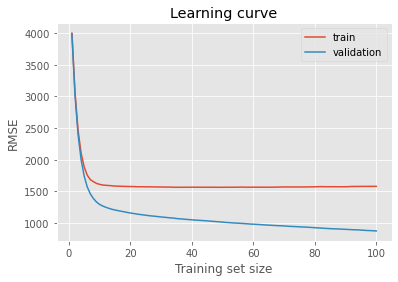

In [ ]:
train_errors = []
val_errors = []

# Loop over the sizes of the training set
for i in range(1,101):
    # Concatenate the models' evaluation results from the first i folds
    train_evals = [models[j].evals_result()['validation_0']['rmse'][:i] for j in range(len(models))]
    val_evals = [models[j].evals_result()['validation_1']['rmse'][:i] for j in range(len(models))]
    
    # Compute the mean and standard deviation of the evaluation results at each training set size
    train_mean = np.mean(train_evals, axis=0)
    train_std = np.std(train_evals, axis=0)
    val_mean = np.mean(val_evals, axis=0)
    val_std = np.std(val_evals, axis=0)
    
    # Append the mean errors to the lists
    train_errors.append(train_mean[-1])
    val_errors.append(val_mean[-1])
    
# Plot the learning curve
plt.plot(range(1, 101), train_errors, label='train')
plt.plot(range(1, 101), val_errors, label='validation')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curve')
plt.legend()
plt.show()





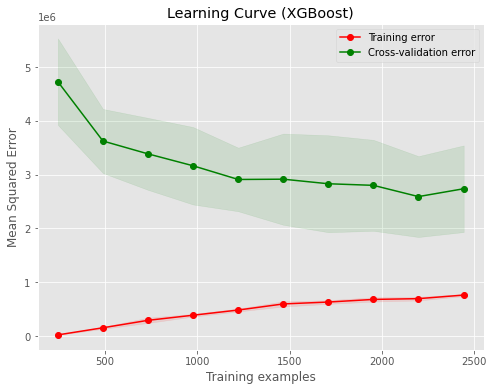

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_mean - valid_std,
                 valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training error")
plt.plot(train_sizes, valid_mean, 'o-', color="g",
         label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.title("Learning Curve (XGBoost)")
plt.show()

In [ ]:
user_id = test["ID"]

model_preds = [model.predict(app_test_encode) for model in models]
model_preds

[array([2678.2932, 3324.8564, 7554.463 , ..., 4114.513 , 3750.1475,
        4778.654 ], dtype=float32),
 array([2718.8513, 2921.1208, 8243.914 , ..., 4400.9478, 3259.5571,
        4690.5854], dtype=float32),
 array([2576.7397, 3352.3645, 7642.4023, ..., 3591.344 , 3787.337 ,
        4706.4604], dtype=float32),
 array([2697.3445, 3191.259 , 8171.2715, ..., 3712.1997, 3190.315 ,
        5796.748 ], dtype=float32),
 array([2496.6108, 3423.7021, 8056.803 , ..., 3613.4924, 3770.2354,
        4921.0493], dtype=float32),
 array([2613.4768, 3328.9893, 7343.8867, ..., 4094.5596, 3052.7625,
        4750.7393], dtype=float32),
 array([2556.3008, 3323.5095, 8309.201 , ..., 3657.6284, 3546.865 ,
        4884.3726], dtype=float32),
 array([2581.7456, 3302.1687, 7756.2246, ..., 4617.6265, 3678.857 ,
        4951.5967], dtype=float32),
 array([2547.5498, 3294.0857, 8062.0464, ..., 3764.9324, 3527.4111,
        4816.4746], dtype=float32),
 array([2597.4739, 3015.313 , 7633.0483, ..., 2932.7227, 3487.19

In [ ]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = user_id
sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

In [ ]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2582
1  2091                 3265
2   585                 7893
3  1455                 7824
4  1801                 2302

In [ ]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2606
1  2091                 3248
2   585                 7877
3  1455                 7830
4  1801                 2275

In [ ]:
sample_submission.shape

(1211, 2)

In [ ]:
sample_submission.to_csv("sample_submission.csv", index = False)

### Private LB best rmse: 1273.2294 - 1st place